# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [13]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(inplace=True)

In [15]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 math*

How many years of data are logged in our dataset? 

In [29]:
df['YEAR'].max() - df['YEAR'].min()
# 12

12

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [36]:
df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean() < df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()
# ohio

True

Find the average for your outcome score across all states in 2019

In [41]:
df[df['YEAR'] == 2003]['AVG_MATH_8_SCORE'].mean()
# did for 2003 since i have none in 2019

276.7647058823529

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [43]:
score = df.groupby('STATE')
score['AVG_MATH_8_SCORE'].mean()

STATE
ALABAMA                 266.285714
ALASKA                  281.285714
ARIZONA                 277.142857
ARKANSAS                274.285714
CALIFORNIA              270.833333
COLORADO                286.428571
CONNECTICUT             284.571429
DELAWARE                281.428571
DISTRICT_OF_COLUMBIA    254.000000
FLORIDA                 276.428571
GEORGIA                 275.857143
HAWAII                  273.285714
IDAHO                   284.142857
ILLINOIS                281.000000
INDIANA                 285.000000
IOWA                    284.714286
KANSAS                  287.285714
KENTUCKY                278.142857
LOUISIANA               270.285714
MAINE                   285.428571
MARYLAND                284.000000
MASSACHUSETTS           296.142857
MICHIGAN                278.000000
MINNESOTA               293.000000
MISSISSIPPI             266.285714
MISSOURI                281.142857
MONTANA                 288.571429
NEBRASKA                284.000000
NEVADA        

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [49]:
df['ISTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
# made this because the amount of instruction each student gets can determine their test scores

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_READING_8_SCORE', ylabel='AVG_MATH_8_SCORE'>

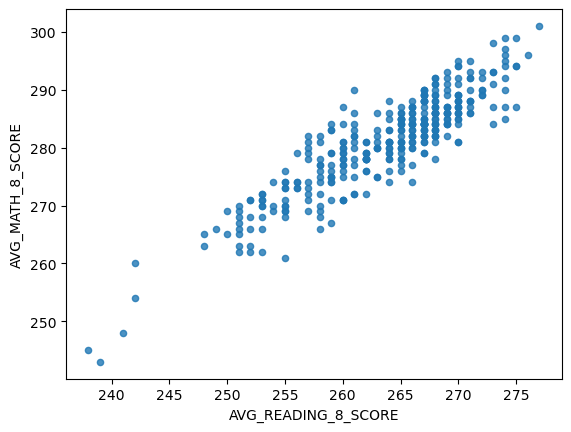

In [51]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)

**<CAPTION FOR VIZ 1>**
there is a strong linear correlation between the two variables

**Visualization 2**

<Axes: xlabel='ISTRUCTION_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

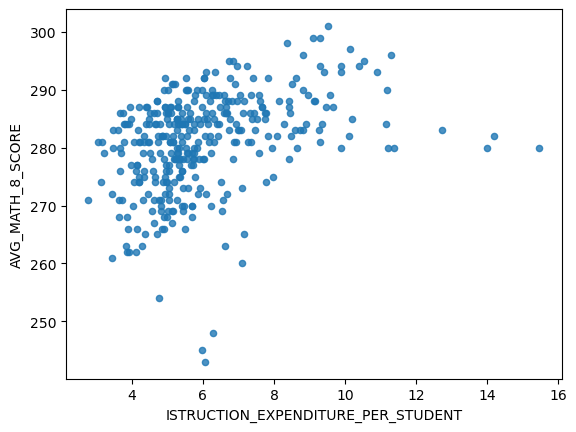

In [52]:
df.plot.scatter(x='ISTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.8)

**<CAPTION FOR VIZ 2>**
there is a slight correlation but not as strong as above

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [58]:
from sklearn.model_selection import train_test_split

In [55]:
X = df[['ISTRUCTION_EXPENDITURE_PER_STUDENT','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [56]:
y.fillna(y.median(), inplace=True)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [60]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [61]:
# create your model here
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

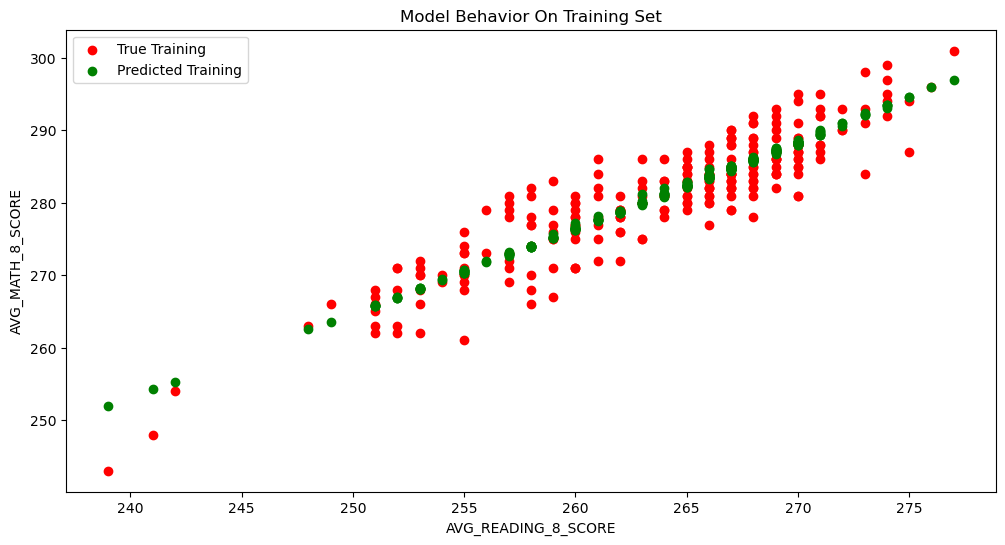

In [70]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

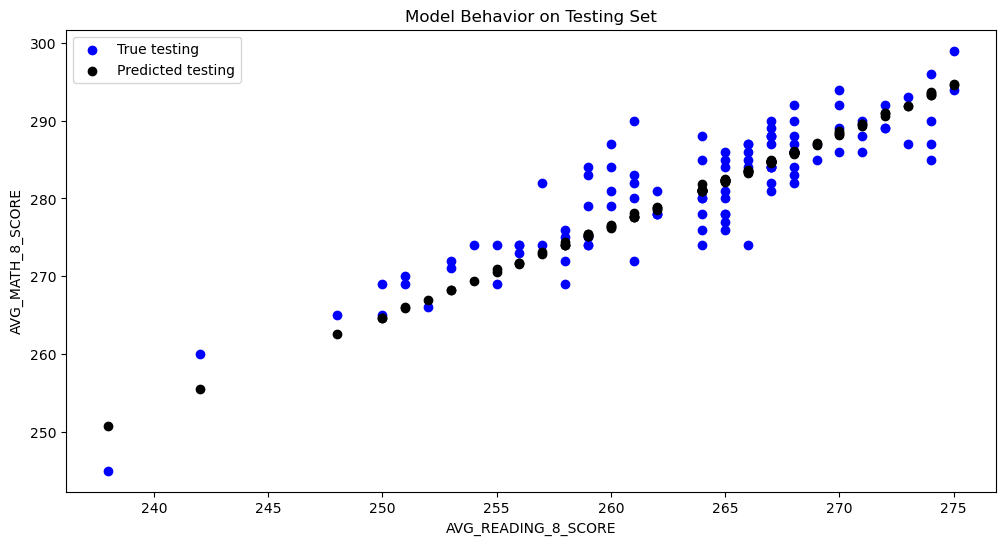

In [71]:
col_name = "AVG_READING_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>
To come to what I have found, I started by importing the dataset and cleaning it by getting rid of all the na's. I engineered a feature and visualized the outcome in relation to a couple of features. I then fitted a linear regression model to predict average math score of grade 8. I found that math 8 scores and reading 8 scores had a strong correlation. As for the performance of the model, the graphs show that it recognized a linear pattern, making it a success in my eyes. 

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**